# Backpropagation Tutorial

**(C) 2019-2025 by [Damir Cavar](http://damir.cavar.me/)**

**Version:** 0.4, October 2025

**Download:** This and various other Jupyter notebooks are available from my [GitHub repo](https://github.com/dcavar/python-tutorial-for-ipython).

## Introduction

For more details on Backpropagation and its use in Neural Networks see Rumelhart, Hinton, and Williams (1986a) and Rumelhart, Hinton & Williams (1986b). A detailed overview is also provided in Goodfellow, Bengio, and Courville (2016).

The ideas and initial versions of this Python-based notebook have been inspired by many open and public tutorials and articles, but in particular by these three:
- Andrew Trask (2015) [*A Neural Network in 11 lines of Python (Part 1)*](https://iamtrask.github.io/2015/07/12/basic-python-network/)
- Matt Mazur (2015) [*A Step by Step Backpropagation Example*](https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/)
- Arunava Chakraborty (2018) [*Derivative of the Sigmoid function*](https://towardsdatascience.com/derivative-of-the-sigmoid-function-536880cf918e)

A lot of code examples and discussion has been compiled here using these sources.

**Prerequisites:**

In [ ]:
!pip install -U numpy

In [ ]:
!pip install -U matplotlib

### Preliminaries

This notebook uses [nbextensions](https://github.com/ipython-contrib/jupyter_contrib_nbextensions) with *python-markdown/main* enabled. These extensions might not work in Jupyter Lab, thus some variable references in the markdown cells might not display.

We will use [numpy](https://numpy.org/) in the following demo. Let us import it and assign the *np* alias to it:

In [1]:
import numpy as np

For plots of curves and functions we will use *pyplot* from *matplotlib*. We will import it here:

In [2]:
from matplotlib import pyplot as plt

## Non-linearity Function and Derivatives

The Sigmoid function is defined as:

$$\sigma(x) = \frac{1}{1 + e^{-x}} $$

We can specify it in Python as:

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

We can now plot the sigmoid function for x values between -10 and 10:

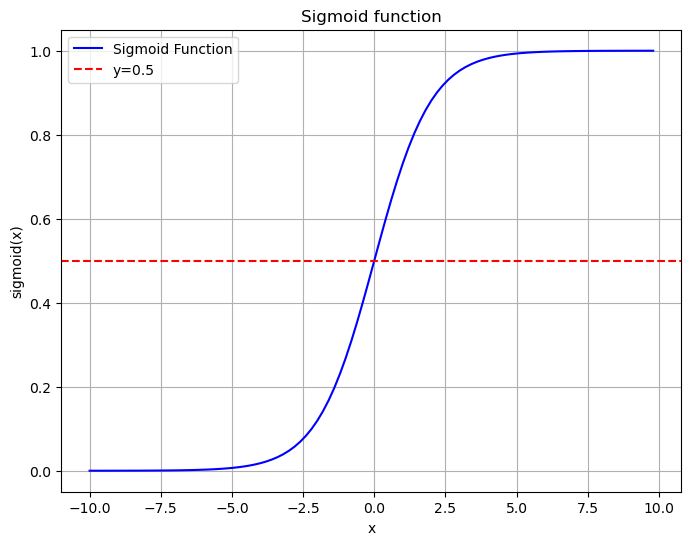

In [8]:
%matplotlib inline
x = np.arange(-10, 10, 0.2)
y = sigmoid(x)
plt.figure(figsize=(8,6))
plt.plot(x, y, label="Sigmoid Function", color='blue')
plt.title("Sigmoid function")
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid(True)
plt.axhline(y=0.5, color='r', linestyle='--', label='y=0.5')
plt.legend()
plt.show()

In the following for Backpropagation we will make use of the Derivative of the Sigmoid function. The Derivative of Sigmoid is defined as:

$$\frac{d}{dx}\sigma(x) = \sigma(x) (1 - \sigma(x))$$

We can derive this equation as follows. Assume that:

$$\frac{d}{dx} \sigma(x) = \frac{d}{dx}  \frac{1}{1 + e^{-x}} $$

We can invert the fraction using a negative exponent:

$$\frac{d}{dx} \sigma(x) = \frac{d}{dx}  \frac{1}{1 + e^{-x}} = \frac{d}{dx} (1 + e^{-x})^{-1}$$

We can apply the *reciprocal rule*, which is, the numerator is the derivative of the function ($g'(x)$) times -1 divided by the square of the denominator $g(x)$:

$$\frac{d}{dx} \left[ \frac{1}{g(x)} \right] = \frac{-g'(x)}{[g(x)]^2} = -g(x)^{-2} g'(x)$$

In our Derivative of Sigmoid derivation, we can now reformulate as:

$$\frac{d}{dx} (1 + e^{-x})^{-1} = -(1 + e^{-x})^{-2} \frac{d}{dx} (1 + e^{-x})$$

With $\alpha$ and $\beta$ constants, the *Rule of Linearity* says that:

$$\frac{d}{dx} \left( \alpha f(x) + \beta g(x) \right) = \frac{d}{dx} \left( \alpha f(x) \right) + \frac{d}{dx} \left( \beta g(x) \right) = \alpha f'(x) + \beta g'(x)$$

This means, using the Rule of Linearity and given that the derivative of a constant is 0, we can rewrite our equation as:

$$\frac{d}{dx} (1 + e^{-x})^{-1} = -(1 + e^{-x})^{-2} \frac{d}{dx} (1 + e^{-x}) = -(1 + e^{-x})^{-2} \left( \frac{d}{dx}[1] + \frac{d}{dx}[e^{-x}] \right) = -(1 + e^{-x})^{-2} \left( 0 + \frac{d}{dx}[e^{-x}] \right) = -(1 + e^{-x})^{-2} \frac{d}{dx}[e^{-x}] $$

The *Exponential Rule* says that:

$$\frac{d}{dx} e^{u(x)} = e^{u(x)} \frac{d}{dx} x$$

We can thus rewrite:

$$\frac{d}{dx} (1 + e^{-x})^{-1} = -(1 + e^{-x})^{-2} e^{-x} \frac{d}{dx}[-x] $$

This is equivalent to:

$$\frac{d}{dx} (1 + e^{-x})^{-1} = -(1 + e^{-x})^{-2} e^{-x} -\frac{d}{dx}[x]$$

Given that a derivative of a variable is 1, we can rewrite as:

$$\frac{d}{dx} (1 + e^{-x})^{-1} = -(1 + e^{-x})^{-2} e^{-x} -1 = (1 + e^{-x})^{-2} e^{-x} = \frac{e^{-x}}{(1 + e^{-x})^2}$$

We can rewrite the derivative as:

$$\frac{d}{dx} (1 + e^{-x})^{-1} = \frac{1 e^{-x}}{(1 + e^{-x}) (1 + e^{-x})} = \frac{1}{1 + e^{-x}} \frac{e^{-x}}{1 + e^{-x}} = \frac{1}{1 + e^{-x}} \frac{e^{-x} + 1 - 1}{1 + e^{-x}} = \frac{1}{1 + e^{-x}} \left( \frac{1 + e^{-x}}{1 + e^{-x}} - \frac{1}{1 + e^{-x}} \right)$$

We can simplify this to:

$$\frac{d}{dx} (1 + e^{-x})^{-1} = \frac{1}{1 + e^{-x}} \left( 1 - \frac{1}{1 + e^{-x}} \right)$$

This means that we can derive the Derivative of the Sigmoid function as:

$$\frac{d}{dx} \sigma(x) = \sigma(x) ( 1 - \sigma(x) )$$

We can specify the Python function of the Derivative of the Sigmoid function as:

In [9]:
def sigmoidDerivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

We can plot the Derivative of the Sigmoid Function as follows:

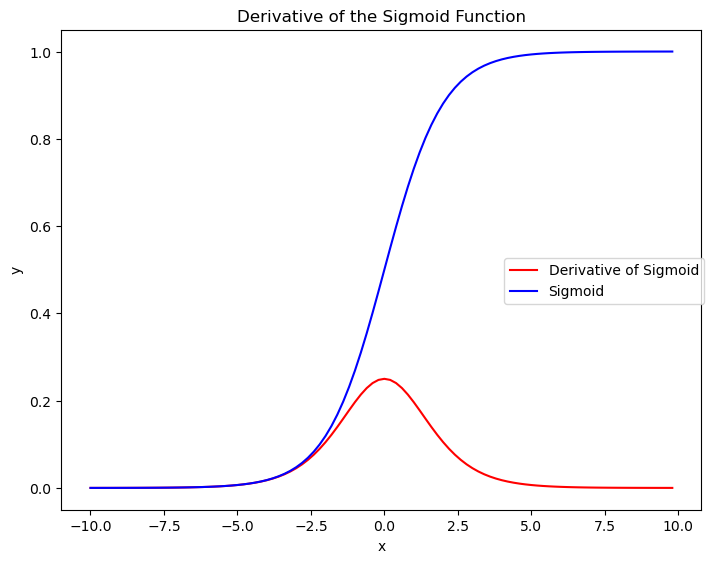

In [10]:
%matplotlib inline
x = np.arange(-10, 10, 0.2)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
y = sigmoidDerivative(x)
ax.plot(x, y, color="red", label='Derivative of Sigmoid'.format(1))
y = sigmoid(x)
ax.plot(x, y, color="blue", label='Sigmoid'.format(1))
fig.legend(loc='center right')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Derivative of the Sigmoid Function")
print()

## Forward- and Backpropagation

We will define a simple network that takes an input as defined for *X* and that generates a corresponding output as defined in *y*. The input array *X* is:

In [11]:
X = np.array( [ [0, 0, 1],
                [0, 1, 1],
                [1, 0, 1],
                [1, 1, 1] ] )

The rows in $X$ are the input vectors for our training or learning phase. Each vector has 3 dimensions.

The output array *y* represents the expected output that the network is expected to learn from the input data. It is defined as a row-vector with 4 rows and 1 column:

In [21]:
y = np.array( [0, 0, 1, 1] ).reshape(-1, 1)
np.shape(y)

(4, 1)

In [13]:
y

array([[0],
       [0],
       [1],
       [1]])

We will define a weight matrix *W* and initialize it with random weights:

In [22]:
W = 2 * np.random.random((3, 1)) - 1
print(W)

[[-0.8202875 ]
 [-0.00909265]
 [-0.77718178]]


In this simple example *W* is the weight matrix that connects two layers, the input (*X*) and the output layer (*O*).

The optimization or learning phase consists of a certain number of iterations that :

In [23]:
iterations = 4000

Let us keep track of the output error (as becomes clear below) in the following variable:

In [24]:
error = 0.0

Repeat for a specific number of iterations the following computations. Initially we take the entire set of training examples in *X* and process them all at the same time. This is called *full batch* training, inidicated by the dot-product between *X* and *W*. Computing *O* is the first prediction step by taking the dot-product of *X* and *W* and computing the sigmoid function over it:

In [25]:
for i in range(iterations):
    O = sigmoid(np.dot(X, W))
    
    O_error = y - O
    error = np.mean(np.abs(O_error))
    if (i % 100) == 0:
        print("Error:", error)
    
    # Compute the delta
    O_delta = O_error * sigmoidDerivative(O)
    
    # update weights
    W += np.dot(X.T, O_delta)

print("O:", O)

Error: 0.5731236671927379
Error: 0.056785338331454445
Error: 0.028508147358049785
Error: 0.018944609451856113
Error: 0.01416600267702821
Error: 0.011305675206111004
Error: 0.009403407807597533
Error: 0.008047588919746726
Error: 0.0070326419395952714
Error: 0.006244529829142009
Error: 0.005614938491912238
Error: 0.005100461975178878
Error: 0.004672204725003539
Error: 0.004310188928141541
Error: 0.004000162376037318
Error: 0.0037316853757200113
Error: 0.003496936399950613
Error: 0.0032899400976307354
Error: 0.003106053157070252
Error: 0.002941612867086706
Error: 0.0027936913339309762
Error: 0.002659920073123397
Error: 0.0025383625436809585
Error: 0.0024274200067505936
Error: 0.002325760970955751
Error: 0.0022322676077972947
Error: 0.0021459945596411607
Error: 0.002066136921332197
Error: 0.001992005097692796
Error: 0.0019230048740741497
Error: 0.0018586214812903734
Error: 0.001798406751282578
Error: 0.0017419686861505296
Error: 0.0016889629276730972
Error: 0.0016390857353145824
Error: 0.0

The matrix *X* has 4 rows and 3 columns. The weight matrix *W* has 3 rows and 1 column. The output will be a row vector with 4 rows and 1 column, representing the output that we want to align as close as possible to *y*.

*O_error* is the difference between *y* and the initial guess in *O*. We want to see *O* to reflect *y* as closely as possible. After {{ iterations }} in the loop above, we see that *O* is resembling *y* very well, with an error of {{ error }}.

In the next step we compute the derivative of the sigmoid function for the initial guess vector. The Derivative is weighted by the error, which means that if the slope was shallow (close to or approaching 0), the guess was quite good, that is the network was confident about the output for a given input. If the slope was higher, as for example for *x = 0*, the prediction was not very good. Such bad predictions get updated significantly, while the confident predictions get updated minimally, multiplying them with some small number close to 0.

For every single weight, we 

## Adding a Layer

In the following example we will slightly change the ground truth. Compare the following definition of *y* with the definition above:

In [26]:
y = np.array([[0],
            [1],
            [1],
            [0]])

In the following network specification we introduce a second layer

In [27]:
2 * np.random.random((3, 4)) - 1

array([[-0.34602089, -0.70568503, -0.43931299,  0.26056263],
       [-0.80246627,  0.04710495,  0.61541483, -0.95650433],
       [-0.08692157, -0.39841791, -0.03351529,  0.76976137]])

In [28]:
2 * np.random.random((4, 1)) - 1

array([[-0.83548567],
       [-0.20718828],
       [ 0.36928625],
       [-0.53699054]])

In [29]:
np.random.seed(1)

# randomly initialize our weights with mean 0
Wh = 2 * np.random.random((3, 4)) - 1
Wo = 2 * np.random.random((4, 1)) - 1

Xt = X.T # precomputing the transform of X for the loop

for i in range(80000):

    # Feed forward through layers X, H, and O
    H = sigmoid(np.dot(X, Wh))
    O = sigmoid(np.dot(H, Wo))

    # how much did we miss the target value?
    O_error = y - O
    error = np.mean(np.abs(O_error))
    if (i % 10000) == 0:
        print("Error:", error)

    # compute the direction of the optimization for the output layer
    O_delta = O_error * sigmoidDerivative(O)

    # how much did each H value contribute to the O error (according to the weights)?
    H_error = O_delta.dot(Wo.T)
    
    # compute the directions of the optimization for the hidden layer
    H_delta = H_error * sigmoidDerivative(H)

    Wo += H.T.dot(O_delta)
    Wh += Xt.dot(H_delta)

print(O)

Error: 0.49641003190272537
Error: 0.3938216036971655
Error: 0.028551004225619604
Error: 0.009888174378132419
Error: 0.0056680222864198705
Error: 0.0037667036033135507
Error: 0.002677532906221103
Error: 0.0020271011932827088
[[0.00154366]
 [0.99805687]
 [0.99828111]
 [0.00135402]]


## References

- Goodfellow, Ian, Yoshua Bengio, Aaron Courville (2016). [Deep Learning](http://www.deeplearningbook.org/). MIT Press.
- Nielsen, Michael A. (2015). "Chapter 2: How the backpropagation algorithm works". Neural Networks and Deep Learning. Determination Press.
- Rumelhart, David E., Geoffrey E. Hinton, Ronald J. Williams (1986a). "Learning representations by back-propagating errors". *Nature* 323 (6088): 533–536. [doi:10.1038/323533a0](https://doi.org/10.1038%2F323533a0).
- Rumelhart, David E., Geoffrey E. Hinton, Ronald J. Williams (1986b). "8. Learning Internal Representations by Error Propagation". In: D. Rumelhart, J.L. McClelland (eds.). Parallel Distributed Processing: Explorations in the Microstructure of Cognition. Volume 1: Foundations. Cambridge: MIT Press.

**(C) 2021-2025 by [Damir Cavar](http://damir.cavar.me/) <<dcavar@iu.edu>>**